# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=True)


Loading dataset:   0%|          | 0/4 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 4/4 [00:20<00:00,  5.04s/it]


# Main

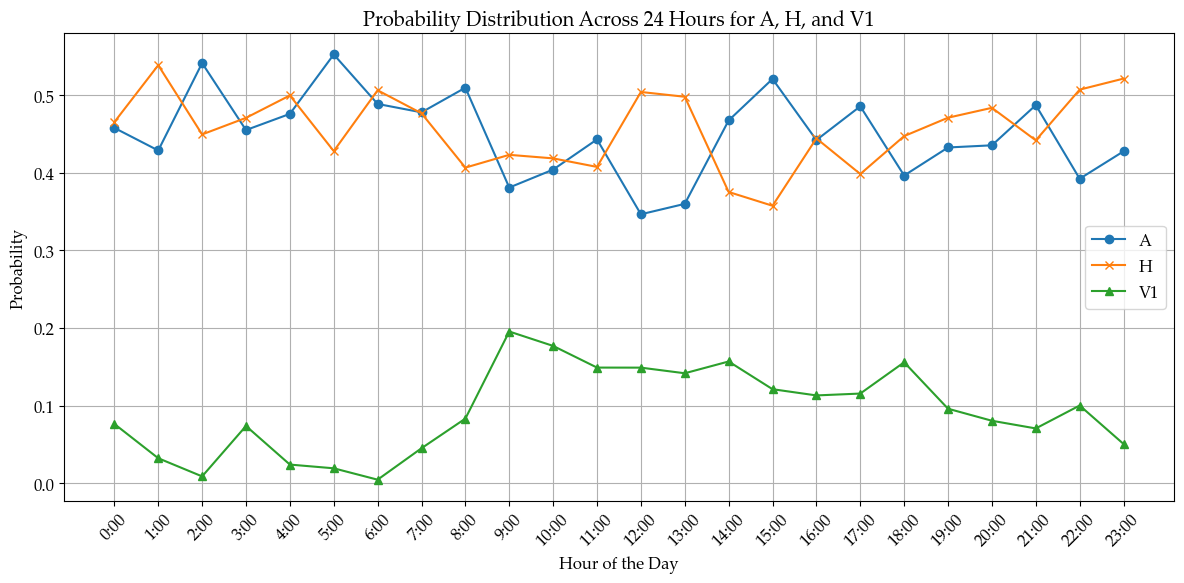

In [5]:
# Raw probabilities for each hour for A, H, and V1
probabilities = [
    (0.45801, 0.465509, 0.0764814), (0.428908, 0.538814, 0.0322795), (0.541539, 0.449588, 0.00887308),
    (0.455225, 0.470947, 0.073828), (0.476072, 0.499828, 0.0240996), (0.552618, 0.428086, 0.0192963),
    (0.488875, 0.506495, 0.00462997), (0.478057, 0.476798, 0.0451465), (0.509834, 0.406805, 0.0833616),
    (0.381115, 0.423292, 0.195594), (0.404257, 0.418724, 0.177017), (0.443176, 0.407725, 0.149099),
    (0.346676, 0.504296, 0.149029), (0.360097, 0.498123, 0.14178), (0.467625, 0.375405, 0.156969),
    (0.521087, 0.357667, 0.121245), (0.44232, 0.444462, 0.113217), (0.485821, 0.398559, 0.115619),
    (0.396623, 0.44744, 0.155938), (0.432771, 0.471142, 0.0960879), (0.435562, 0.483872, 0.0805665),
    (0.487359, 0.441968, 0.0706736), (0.392469, 0.507302, 0.100229), (0.427796, 0.521541, 0.0506629)
]

# Separating the probabilities for A, H, and V1
probabilities_A = [p[0] for p in probabilities]
probabilities_H = [p[1] for p in probabilities]
probabilities_V1 = [p[2] for p in probabilities]

hours = list(range(24))  # 24 hours

# Plotting the probabilities for A, H, and V1 over the 24-hour period
plt.figure(figsize=(12, 6))
plt.plot(hours, probabilities_A, label='A', marker='o')
plt.plot(hours, probabilities_H, label='H', marker='x')
plt.plot(hours, probabilities_V1, label='V1', marker='^')
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)  # Format x-axis labels as "hour:00"
plt.xlabel('Hour of the Day')
plt.ylabel('Probability')
plt.title('Probability Distribution Across 24 Hours for A, H, and V1')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


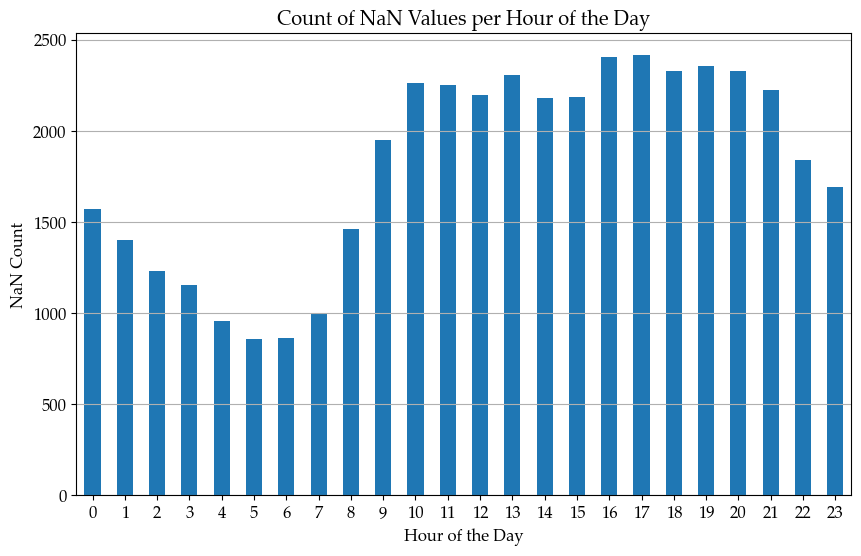

In [9]:

df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

# Extract the hour from the datetime column
df["hour"] = df["time_call_received"].dt.hour

# Count NaNs per hour
nan_counts_per_hour = df[df["time_departure_scene"].isna()].groupby("hour")["time_departure_scene"].size()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
nan_counts_per_hour.plot(kind="bar")
plt.title("Count of NaN Values per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("NaN Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
